In [ ]:
pip install tweepy

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tweepy as tw
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import re    
import nltk  
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *


from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/kaggle/input/twitter-and-reddit-sentimental-analysis-dataset/Twitter_Data.csv
/kaggle/input/twitter-and-reddit-sentimental-analysis-dataset/Reddit_Data.csv


In [2]:
df = pd.read_csv('../input/twitter-and-reddit-sentimental-analysis-dataset/Twitter_Data.csv')
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [3]:
df.shape

(162980, 2)

In [ ]:
df.describe

In [ ]:
df.isnull().sum()

In [4]:
df.dropna(axis=0,inplace=True)

In [5]:
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


<AxesSubplot:xlabel='count', ylabel='category'>

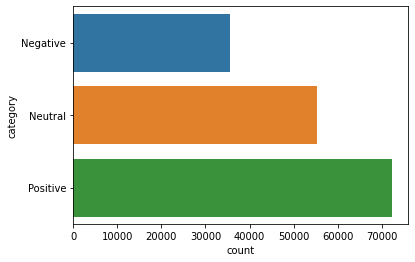

In [6]:
sns.countplot(data=df,y='category')

In [ ]:
df.describe()

In [ ]:
import plotly.express as px
fig = px.pie(df, names='category', title ='Pie chart of different sentiments of tweets')
fig.show()

In [7]:
def ttw(tweet):
    text = tweet.lower()
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    words = text.split()
    words = [w for w in words if w not in stopwords.words("english")]
    words =[PorterStemmer().stem(w) for w in words]
    return words
print("\n", df['clean_text'][0])
print("\n", ttw(df['clean_text'][0]))


 when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

 ['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']


In [8]:
X = list(map(ttw, df['clean_text']))

In [9]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
Y = enc.fit_transform(df['category'])

In [10]:
print(X[0])
print(Y[0])

['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']
0


In [11]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vocabulary_size = 5000
count_vector = CountVectorizer(max_features=vocabulary_size,preprocessor=lambda x:x,tokenizer=lambda x:x)
X_train = count_vector.fit_transform(X_train).toarray()
X_test = count_vector.transform(X_test).toarray()

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len = 50

def tokenize_padding(text):
    token = Tokenizer(num_words=max_words, lower=True, split=' ')
    token.fit_on_texts(text)
    X = token.texts_to_sequences(text)
    X = pad_sequences(X,padding='post',maxlen = max_len)
    return X,token
print(df['clean_text'][0])
X, tokenizer = tokenize_padding(df['clean_text'])
print(X[0])

when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
[  42    1  307   66 1726 1119   40 2378    2 1211  205    2  215   32
  155  100   49   69 1068  215   50    3    6  546    3   50 4179    3
 2806    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [14]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [15]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (97781, 50) (97781, 3)
Validation Set -> (32594, 50) (32594, 3)
Test Set -> (32594, 50) (32594, 3)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets

from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History
from tensorflow.keras import losses

vocab_size = 5000
embedding_size = 32
epochs = 10
learning_rate = 0.1
decay_rate = learning_rate/epochs
momentum = 0.8

sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate,nesterov=False)
model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

2022-10-06 02:15:44.766516: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-06 02:15:44.869877: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-06 02:15:44.870673: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-06 02:15:44.872463: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

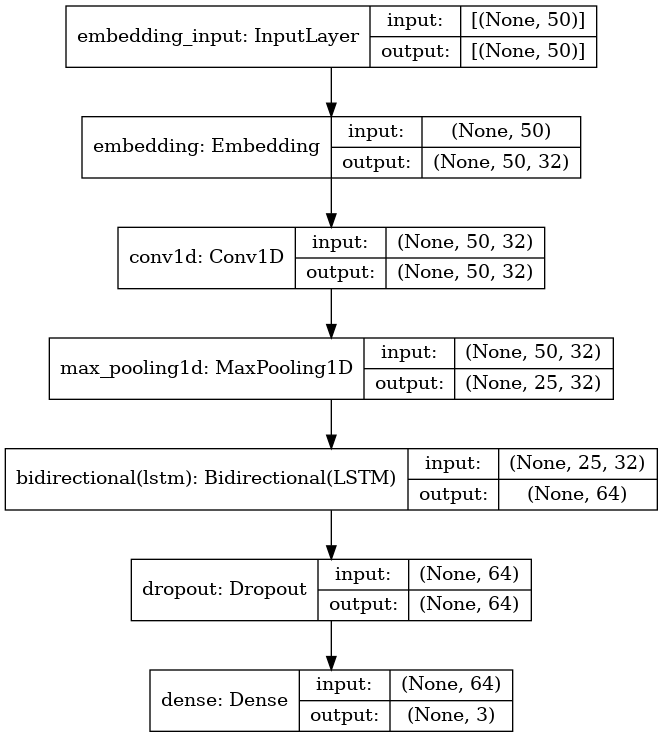

In [17]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 32)            160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 50, 32)            3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 25, 32)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 179,939
Trainable params: 179,939
Non-trainable params: 0
__________________________________________________

In [20]:
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy',Precision(),Recall()])

batch_size = 32
history = model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size=batch_size,epochs=epochs, verbose=1)

2022-10-06 02:17:07.382931: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-10-06 02:17:10.956280: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


3056/3056 [==============================] - 38s 9ms/step - loss: 0.9735 - accuracy: 0.5343 - precision_1: 0.5802 - recall: 0.3675 - val_loss: 0.9589 - val_accuracy: 0.5441 - val_precision_1: 0.5836 - val_recall: 0.4045
Epoch 2/10
3056/3056 [==============================] - 28s 9ms/step - loss: 0.9292 - accuracy: 0.5706 - precision_1: 0.6254 - recall: 0.4213 - val_loss: 0.8766 - val_accuracy: 0.6065 - val_precision_1: 0.6715 - val_recall: 0.4754
Epoch 3/10
3056/3056 [==============================] - 27s 9ms/step - loss: 0.8010 - accuracy: 0.6558 - precision_1: 0.7194 - recall: 0.5530 - val_loss: 0.7395 - val_accuracy: 0.6733 - val_precision_1: 0.7219 - val_recall: 0.6194
Epoch 4/10
3056/3056 [==============================] - 27s 9ms/step - loss: 0.6806 - accuracy: 0.7126 - precision_1: 0.7667 - recall: 0.6506 - val_loss: 0.6350 - val_accuracy: 0.7274 - val_precision_1: 0.7793 - val_recall: 0.6758
Epoch 5/10
3056/3056 [==============================] - 27s 9ms/step - loss: 0.6125 - a

In [22]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))



Accuracy  : 0.8128
Precision : 0.8324
Recall    : 0.7854


In [23]:
model.save('best_model.h5')


In [24]:
from keras.models import load_model

model = load_model('best_model.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=50
    xt = tokenizer.texts_to_sequences(text)
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    yt = model.predict(xt).argmax(axis=1)
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [33]:
predict_class(['Dai Minh is the best undergraduate in the world, perfect GPA'])

The predicted sentiment is Positive
